In [8]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [9]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [10]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

Assumption 1: Linear relationship

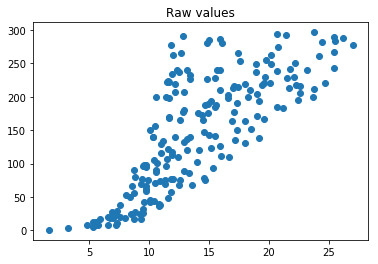

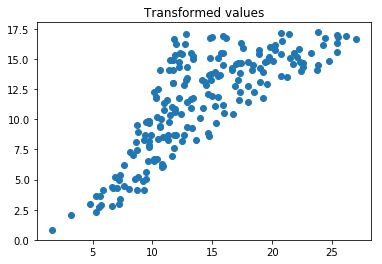

In [11]:
feature = data['TV']
outcome= data['Sales']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()


Assumption 2: Multivariate normality

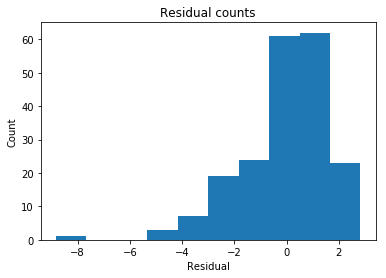

In [12]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Assumption 3: Homoscedasticity

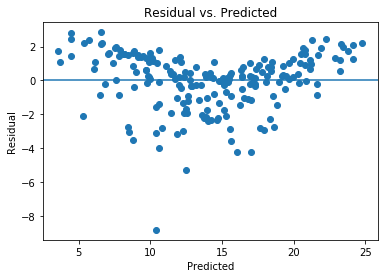

In [13]:


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
np.argsort(residual)

In [16]:
# Dropping the outliers to make the values normally distributed and consistent
np.argsort(residual)[::-1]

199    117
198     91
197    128
196     76
195     55
194     60
193    195
192    175
191    127
190    182
189    147
188    183
187     36
186     32
185     52
184     34
183     58
182    129
181    185
180     71
179    198
178     46
177    108
176    143
175    107
174    151
173     15
172      0
171     10
170     24
      ... 
29       1
28       9
27     136
26     122
25     146
24     155
23     100
22      21
21     174
20     150
19     165
18      81
17     135
16     188
15     132
14     166
13     102
12     131
11     169
10       2
9       56
8      158
7       75
6       78
5       25
4      126
3       35
2      178
1        5
0      130
Name: Sales, Length: 200, dtype: int64

In [22]:
Y[130],predicted[130]

(array([1.6]), 10.427687101769543)

In [25]:
data.drop([data.index[130] , data.index[5], data.index[91], data.index[117]], inplace=True)

In [34]:
#Multivariate Normality
# Instantiate and fit our model after dropping the outliers.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04459304  0.19931139 -0.00242238]]

Intercept: 
 [2.94853443]

R-squared:
0.9166581306630558


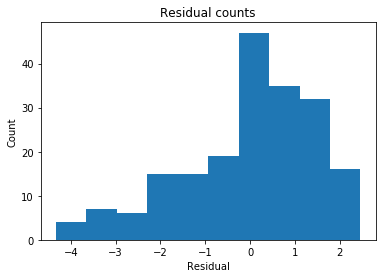

In [35]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual after droping the outliers.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

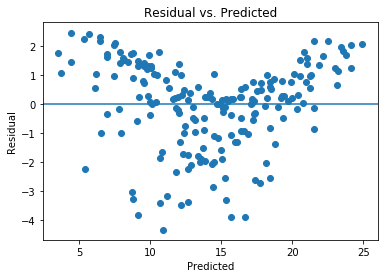

In [36]:
#Homoscedasticity after droping the outliers

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()